### Microbial resistance genes notebook

#### Bats: Resistance and production of antibiotics while roosting or on the wing

Understanding resistance to antibiotics is a critical need management of infectious diseases. Antibiotic resistance genes have been found across a range of environments from soils, caves, human skin, surfaces in hospitals, rivers, oceans, and fecal matter. These environments can act as transferable reservoirs of antibiotic resistance. Bats have been identified as being reservoirs of new and novel viruses (Calisher et al., 2006). However, little is known about the microbial resistance genes on found on bats and if these can act as reservoirs for transferring resistance genes in the environment.

#### Authors
Ara S. Winter<sup>1</sup>*, Jason C. Kimble<sup>1</sup>, Debbie C. Buecher<sup>2</sup>, Ernest W. Valdez<sup>3</sup>, Jennifer J. M. Hathaway<sup>1</sup>, Andrea Porras-Alfaro<sup>4</sup>, and Diana E. Northup<sup>1</sup>

1 Department of Biology, University of New Mexico, Albuquerque, New Mexico, United States of America

2 Buecher Biological Consulting, Tucson, Arizona, United States of America

3 United States Geological Survey, Fort Collins Science Center, Colorado; Biology Department, MSC03 2020, University of New Mexico, Albuquerque, New Mexico, United States of America

4 Department of Biological Sciences, Western Illinois University, Macomb, Illinois, United States of America

Corresponding author

E-mail: akooser@unm.edu

### Methods

#### Bat sampling
We sampled 31 bats belonging to 4 species (Myotis thysanodes M. velifer, Tadarida brasiliensis, and Antrozous pallidus). These samples came from three study locations in Carlsbad Caverns National Park (CCNP). Bat sample collection was allowed under the following permits: National Park Service Scientific Collecting Permit (CAVE-2014-SCI-0012), Fort Collins Science Center Standard Operating Procedure (SOP) SOP#: 2013-01, and an Institutional Animal Care and Use Committee (IACUC) Permit from the University of New Mexico (Protocol #15-101307-MC) and from the National Park Service (Protocol #IMR_ELMA.PARA.CAVE.SEAZ_Northup_Bats_2015.A2).

Cave-caught bats were either plucked from the walls of the caves in ELMA, FS, and HGL or netted in sterilized nets in Carlsbad Cavern in CCNP in a location along their flight path out of the cave. Cave-caught bats were typically sampled 6-8 hours after returning to the cave in the early morning. Surface-netted bats were netted after sundown using sterilized nets near water sources in CCNP. All bats were handled with clean gloves and swabbed for DNA before other measurements were taken to limit contamination by human-associated microbiota. Using a sterile swab moistened with Ringer’s Solution (Hille, 1984), the entire skin (i.e., ears, wings and uropatagia) and furred surfaces of each bat were thoroughly swabbed. While the bat biologist held the bat in appropriate positions to give access to the area to be swabbed, the microbiologist rubbed each area with the sterile swab approximately 3-5 times, rotating the swab as the action was performed.

Each swab was placed in a sterile 1.7 ml snap-cap microcentrifuge tube containing 100 ul of RNAlater, and immediately frozen in a liquid nitrogen dry shipper or placed on dry ice. Samples were transported to the University of New Mexico and stored in a -80°C freezer. Samples were sent to MR DNA Molecular Research LP, Shallowater, Texas (http://www.mrdnalab.com/) for genomic DNA extraction.

#### Sequencing
Metagenomic shotgun reads were sequenced at MR DNA (2015-2016) using HiSeq 2x150bp Illumina HiSeq 2500 platform (www.illumina.com) sequencing. Metagenome sequencing steps included the isolation and purification of genomic DNA, fragmentation, ligation to sequencing adapters and purification. Libraries were pooled and sequenced following amplification and denaturation. A total of 50 ng of DNA from each of the FSC samples was used to prepare DNA libraries using Nextera DNA library preparation kit to build individual barcode catalogs. Library insert size was determined by Experion Automated Electrophoresis Station (Bio-Rad). Pooled library (12pM) was loaded to a 600 Cycles v3 Reagent cartridge (Illumina).

#### Data processing
Join paired-ends
pear -y 8G -j 2 -p 0.05 -g 2 -f RSS140624-1_S19_L002_R1_001.fastq.gz -r RSS140624-1_S19_L002_R2_001.fastq.gz 
-o RSS140624_1_S19 

##### Fastq convert to fasta
fastq_to_fasta.py

##### Digital normalization (removes redundant kmers)
normalize-by-median.py -k 21 -M 8e9 --cutoff=20 ELMA140612_1_S56.fasta (khmer package)

##### Recover LSU and SSUs from reads
metaxa2 -i CC15062425_S8.fasta -o CC15062425_S8 --cpu 6 --align none

metaxa2_ttt -i CC15062425_S8.taxonomy.txt -o CC15062425_S8_taxa_sum.txt

Put all the L2 and L3 into separate folders and then run:
metaxa2_dc -o metaxa_summary_L2.txt -r *.level_2.txt

##### Hashing to metagenomes (sourmash and mash) 

sourmash compute -f ELMA140612_1_S56.fasta.keep

sourmash compare *.sig -o cmp

sourmash plot cmp

##### Convert nuc reads to aa
prodigal -i CC15062421_S7.classseqs.fasta -a CC15062421_S7.faa -p meta > /dev/null

##### Functional gene annotation
hmmsearch --cpu 6 --domtblout retroviridae_S19 ~/Documents/hmmer_profiles/eggnog/hmm_files/retorviridae_eggnog.hmm CC1506261_S19.faa > /dev/null

Used: resFam-full.hmm, custom fungal nrps, PKSII alpha, and pfam secondary metabolite profiles.


In [1]:
import seaborn as sns
import pandas as pd
import glob
import os

# This is a commnet. The line the follows allows for inline plotting. i.e. your plots will show up in these boxes.
%matplotlib inline

The chunk of code that follows here is for wrangling the output of hmmer functional gene profiling into something human readable and readable by pandas in python. 

In [2]:
path = '/Users/ara/Documents/bat_metagenomes/antiresfams/'                     # use your path

In [3]:
my_dir = path
filelist = []
filesList = []
os.chdir( my_dir )

In [4]:
for files in glob.glob("*.antiresfam"):
    #fileName, fileExtension = os.path.splitext(files)
    filelist.append(filesList) #filename without extension
    filesList.append(files) #filename with extension

In [5]:
df = pd.DataFrame()
for ijk in filesList:
    frame = pd.read_csv(ijk,skiprows=3, skipfooter=11 ,delim_whitespace=True,
                      engine='python',header=None)
    frame['sample_id']=ijk
    df = df.append(frame) 
    

In [6]:
df.columns = ['hmmer_seq','','','gene','','','E-value','bit score','','','','','','','','','','','','','','',
                         '','','','','','','','','sample_id']

In [7]:
df.head(3)

,hmmer_seq,,,gene,,,E-value,bit score,,,...,,,,,,,,,,sample_id
0,D00420:54:H9U8TADXX:1:1116:20358:80426_2,-,59,16S_rRNA_methyltrans,RF0001,251,2.10,14.4,0.0,1,...,0.85,#,116,#,292,#,-1,#,ID=681296_2;partial=01;start_type=Edge;rbs_mot...,CC140620_1.antiresfam
1,D00420:54:H9U8TADXX:1:2107:4568:30674_1,-,90,16S_rRNA_methyltrans,RF0001,251,5.30,13.2,0.0,1,...,0.81,#,3,#,272,#,1,#,ID=1609359_1;partial=11;start_type=Edge;rbs_mo...,CC140620_1.antiresfam
2,D00420:54:H9U8TADXX:1:2111:15828:70516_1,-,66,AAC3,RF0002,292,0.66,15.4,0.0,1,...,0.87,#,2,#,199,#,1,#,ID=1797766_1;partial=11;start_type=Edge;rbs_mo...,CC140620_1.antiresfam


In [8]:
hmmer_results = df.loc[:,['hmmer_seq','gene','E-value','bit score','sample_id']]

In [9]:
hmmer_filter = hmmer_results.loc[hmmer_results['bit score'] > 24]

In [10]:
hmmer_filter.shape

(343416, 5)

In [11]:
df = hmmer_filter.groupby( [ "sample_id", "gene"] ).size().to_frame(name = 'count').reset_index()

In [12]:
hmmer_pivot = df.pivot(index='sample_id', columns='gene', values='count')

In [13]:
del hmmer_pivot.index.name

In [14]:
hmmer_pivot.shape

(34, 169)

In [15]:
hmmer_clean = hmmer_pivot.fillna(0)

In [16]:
hmmer_clean.reset_index(level=0, inplace=True)

In [17]:
hmmer_clean=hmmer_clean.rename(columns = {'index':'id'})

In [18]:
hmmer_clean.head(3)

gene,id,AAC3,AAC3-I,AAC6-I,AAC6-II,AAC6-Ib,ABC1,ABC2_membrane,ABC_efflux,ABC_tran,...,vanC,vanD,vanH,vanR,vanS,vanT,vanW,vanX,vanY,vanZ
0,CC140620_1.antiresfam,0.0,1.0,0.0,1.0,0.0,0.0,0.0,940.0,0.0,...,34.0,36.0,63.0,312.0,200.0,36.0,1.0,12.0,2.0,0.0
1,CC140620_25.antiresfam,0.0,0.0,1.0,0.0,0.0,0.0,0.0,645.0,0.0,...,16.0,15.0,47.0,225.0,159.0,39.0,1.0,4.0,3.0,0.0
2,CC140620_33.antiresfam,0.0,1.0,0.0,1.0,0.0,18.0,13.0,449.0,275.0,...,20.0,17.0,21.0,168.0,117.0,22.0,1.0,0.0,2.0,0.0


In [19]:
hmmer_clean.columns

Index(['id', 'AAC3', 'AAC3-I', 'AAC6-I', 'AAC6-II', 'AAC6-Ib', 'ABC1',
       'ABC2_membrane', 'ABC_efflux', 'ABC_tran',
       ...
       'vanC', 'vanD', 'vanH', 'vanR', 'vanS', 'vanT', 'vanW', 'vanX', 'vanY',
       'vanZ'],
      dtype='object', name='gene', length=170)

### Results

#### Top twenty resistance gene hits

In [20]:
hmmer_clean.sum(numeric_only=True).sort_values(ascending=False).head(20)

gene
msbA                      43343.0
ABC_efflux                35218.0
macB                      28951.0
drrA                      20730.0
RND_efflux                12674.0
ABC_tran                  12231.0
vanR                      12132.0
Fluor_Res_DNA_Topo         8912.0
MFS_1                      8372.0
vanS                       7924.0
baeR                       7876.0
ACR_tran                   7460.0
adeB                       7134.0
MexW-MexI                  7072.0
emrB                       6613.0
MFS_efflux                 5851.0
adeR                       4912.0
tet_ribosomoal_protect     4787.0
tet_MFS_efflux             4265.0
Chlor_Efflux_Pump          4047.0
dtype: float64

Here we are reading in the metadata file.

In [37]:
metadata = pd.read_csv("antiresfam_metadata.txt",sep="\t",header=0)

In [38]:
metadata.shape

(34, 8)

In [39]:
metadata.head(3)

,id,sample,species,location,cave_or_surface,recov_lsu_ssu,library_size,avg_seq_len
0,CC140620_1.antiresfam,CC140620_1,Myotis velifer,CAVE,cave,706,1413632.0,181.2
1,CC140620_25.antiresfam,CC140620_25,Myotis velifer,CAVE,cave,273,1629876.0,198.4
2,CC140620_33.antiresfam,CC140620_33,Myotis velifer,CAVE,cave,193,576956.0,193.9


In [40]:
merged_hmmer = pd.merge(hmmer_clean, metadata, on='id')

In [41]:
merged_hmmer.shape

(34, 177)

In [42]:
merged_hmmer.head(3)

gene,id,AAC3,AAC3-I,AAC6-I,AAC6-II,AAC6-Ib,ABC1,ABC2_membrane,ABC_efflux,ABC_tran,...,vanX,vanY,vanZ,sample,species,location,cave_or_surface,recov_lsu_ssu,library_size,avg_seq_len
0,CC140620_1.antiresfam,0.0,1.0,0.0,1.0,0.0,0.0,0.0,940.0,0.0,...,12.0,2.0,0.0,CC140620_1,Myotis velifer,CAVE,cave,706,1413632.0,181.2
1,CC140620_25.antiresfam,0.0,0.0,1.0,0.0,0.0,0.0,0.0,645.0,0.0,...,4.0,3.0,0.0,CC140620_25,Myotis velifer,CAVE,cave,273,1629876.0,198.4
2,CC140620_33.antiresfam,0.0,1.0,0.0,1.0,0.0,18.0,13.0,449.0,275.0,...,0.0,2.0,0.0,CC140620_33,Myotis velifer,CAVE,cave,193,576956.0,193.9


### Plot

This is a plot of total number of sequences and the recovered LSU and SSU genes from metaxa2.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


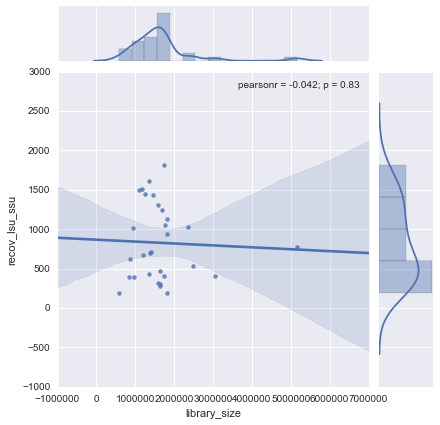

In [283]:
g = sns.jointplot("library_size", "recov_lsu_ssu", kind="reg", data=merged_hmmer)

### Notes
The total library size (# of sequences) does not track with the recovered LSU and SSU genes from metaxa. This means we
can use the total LSU and SSU to normalize our data. This will correct (in a biologically relevant way) for varying library sizes across all of our samples. 

### Library size
The library size here is the mean number of sequences by bat species. I want to make sure we are seeing a real signal downstream. 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


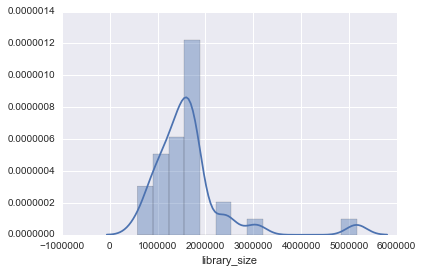

In [284]:
sns.distplot(merged_hmmer.library_size)

In [285]:
merged_hmmer.groupby('species')['library_size'].mean()

species
Antrozous pallidus       1232007
Myotis thysanodes        2564294
Myotis velifer           1580415
Tadarida brasiliensis    1509662
Name: library_size, dtype: int64

### Total recovery LSU and SSU genes

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


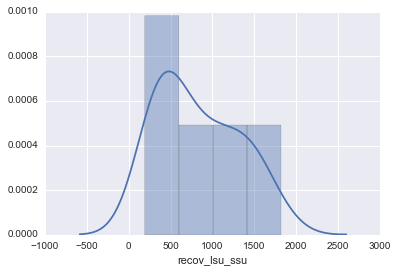

In [286]:
sns.distplot(merged_hmmer.recov_lsu_ssu)

In [287]:
merged_hmmer.groupby('species')['recov_lsu_ssu'].mean()

species
Antrozous pallidus       1230.428571
Myotis thysanodes         473.200000
Myotis velifer            572.200000
Tadarida brasiliensis    1014.625000
Name: recov_lsu_ssu, dtype: float64

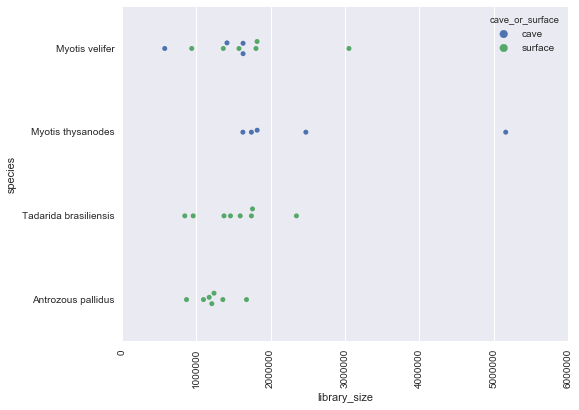

In [288]:
p0 = sns.swarmplot(x="library_size", y="species", data=merged_hmmer, hue="cave_or_surface")
sns.despine()
for item in p0.get_xticklabels():
    item.set_rotation(90)
p0.figure.set_size_inches(8,6)

### Background
Nesme et al., 2014 paper, Large-Scale Metagenomic-Based Study of Antibiotic Resistance in the Environment showed that microbial resistance genes are present in a range of environments. 

>"The most common types of resistances found in
>environmental metagenomes were efflux pumps and
>genes conferring resistance to vancomycin, tetracycline,
>or b-lactam antibiotics used in veterinary and human healthcare.
>Our study describes the diverse and abundant antibiotic
>resistance genes in nonclinical environments and
>shows that these genes are not randomly distributed among
>different environments"




It's possible that cave-caught bats and surface-netted bats have a different distrubtion of resistance genes. Our plots then need to show which are the cave-caught bats and surface-netted bats. 

#### 9/28/2016 
I suspect that we should see difference between locations (local), ecoregion (regional), and bat species. This should vary depending on the gene we are looking at. I think the broad spectrum are more wide spread? We need to see if there are unqiue gene hits for a given category. In other words are there resistance genes that only show up in caves or one one species of bat. 

#### 9/29/16
Getting a little more serious Nesme et al., 2014 paper gave a list of most common resistance genes from 71 metageomes across many different environments.

| Resistance class                                                                                     | Mechanism of Resistance                                                                                                                                   | Antibiotic Specificity      |
|------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------|
| mexef, ceo, mexvw, acr, mexhi, mexcd, mexab, mdtnop, amr, adeabc, smeabc, smedef, mdtef, mexxy, mdtk | RND class transporter                                                                                                                                     | multidrug resistance efflux |
| macab                                                                                                | RND class transporter: macrolide                                                                                                                          | multidrug resistance efflux |
| bcr, bcr_mfs                                                                                         | ABC class transporter system: bacitracin                                                                                                                  | multidrug resistance efflux |
| mls_abc                                                                                              | ABC class transporter: macrolide                                                                                                                          | multidrug resistance efflux |
| mls_mfs, mls_hdr                                                                                     | MFS class transporter: macrolide                                                                                                                          | multidrug resistance efflux |
| cml                                                                                                  | MFS class transporter: chloramphenicol                                                                                                                    | multidrug resistance efflux |
| rosab                                                                                                | potassium antiporter system                                                                                                                               | multidrug resistance efflux |
| mepa, norm                                                                                           | MATE transporter                                                                                                                                          | multidrug resistance efflux |
| tcma, mdr, qac                                                                                       | MFS transporter                                                                                                                                           | multidrug resistance efflux |
| vana, vanb, vanc, vand, vane, vang                                                                   | vancomycin resistance operon genes (vanH, vanS, vanR, vanX, and vanY) for each vancomycin resistance operon: VanA, VanB, VanC, VanD, VanE, and VanG types | vancomycin                  |
| tet_rpp                                                                                              | tetracyline ribosomal protection protein                                                                                                                  | tetracycline                |
| tet_efflux                                                                                           | tetracyline-specific efflux pump                                                                                                                          | tetracycline                |
| tet_flavo                                                                                            | flavoproteins resistance to tetracyline                                                                                                                   | tetracycline                |
| bla_a, bla_b                                                                                         | class A and class B b-lactamases                                                                                                                          | b-lactams                   |
| pbp                                                                                                  | penicillin-binding protein                                                                                                                                | b-lactams                   |
| baca                                                                                                 | bacitracin resistance                                                                                                                                     | bacitracin                  |
| cata                                                                                                 | chloramphenicol acetyltransferase                                                                                                                         | chloramphenicol             |
| ksga                                                                                                 | kasugamycin resistance                                                                                                                                    | kasugamycin                 |
| arna                                                                                                 | polymixin resistance                                                                                                                                      | polymixin                   |
| pur8                                                                                                 | puromycin resistance                                                                                                                                      | puromycin                   |
| vat                                                                                                  | virginiamycin resistance                                                                                                                                  | streptogramin               |
| sul                                                                                                  | sulfonamide resistance                                                                                                                                    | sulfonamide                 |
| dfra                                                                                                 | trimethoprim resistance                                                                                                                                   | trimethoprim                |

This is a table from their paper with the most common hits. Sadly the antresfams hmmer database doesn't use this exact naming scheme. So we need to match things up. 

More importanty I want to see if bats share the same most common antires genes. 

Here are the top twenty resistance genes among the CAVE bats we sampled.

| Resistance class (antiresfam) | Counts | Mechanism of Resistance                             | Antibiotic Specificity                                       |
|-------------------------------|--------|-----------------------------------------------------|--------------------------------------------------------------|
| msbA                          | 38828  | ABC class transporter                               | multidrug resistance                                         |
| ABC_efflux                    | 31512  | ABC class transporter                               | multidrug resistance efflux                                  |
| macB                          | 26058  | RND class transporter: macrolide                    | multidrug resistance efflux                                  |
| drrA                          | 15841  | doxorubicin and daunorubicin resistance operon gene | doxorubicin and daunorubicin                                 |
| vanR                          | 10505  | vancomycin resistance operon gene                   | vancomycin                                                   |
| RND_efflux                    | 9615   | RND class transporter                               | multidrug resistance efflux                                  |
| ABC_tran                      | 9133   | ABC class transporter                               | multidrug resistance efflux                                  |
| Fluor_Res_DNA_Topo            | 8289   |                                                     |                                                              |
| baeR                          | 6795   |                                                     | novobiocin                                                   |
| vanS                          | 6760   | vancomycin resistance operon gene                   | vancomycin                                                   |
| MFS_1                         | 5626   | ABC class transporter system: bacitracin            | multidrug resistance efflux                                  |
| MexW-MexI                     | 5482   | RND class transporter                               | multidrug resistance efflux                                  |
| emrB                          | 5480   |                                                     | multidrug resistance efflux                                  |
| adeB                          | 5457   |                                                     | Multidrug resistance efflux: aminoglycoside; chloramphenicol |
| MFS_efflux                    | 4969   |                                                     | multidrug resistance efflux                                  |
| tet_ribosomoal_protect        | 4438   | tetracycline resistance genes                       | tetracycline                                                 |
| adeR                          | 4265   |                                                     | Multidrug resistance efflux:                                 |
| ACR_tran                      | 3924   |                                                     | Acriflavine                                                  |
| tet_MFS_efflux                | 3518   | MFS class transporter                               | multidrug resistance efflux                                  |
| Chlor_Efflux_Pump             | 3328   |                                                     | multidrug resistance efflux                                  |

We see a very similar pattern with efflux pumps and resistance genes for vancomycin, tetracycline, novobiocin or b-lactam antibiotics. In plot p2 (above) there seems to be a non-random disturbiton of these genes by species. 

In [47]:
merged_hmmer['msbA_S'] = merged_hmmer[['msbA']].div(merged_hmmer.recov_lsu_ssu, axis=0)
merged_hmmer['ABC_efflux_S'] = merged_hmmer[['ABC_efflux']].div(merged_hmmer.recov_lsu_ssu, axis=0)
merged_hmmer['macB_S'] = merged_hmmer[['macB']].div(merged_hmmer.recov_lsu_ssu, axis=0)
merged_hmmer['drrA_S'] = merged_hmmer[['drrA']].div(merged_hmmer.recov_lsu_ssu, axis=0)
merged_hmmer['vanR_S'] = merged_hmmer[['vanR']].div(merged_hmmer.recov_lsu_ssu, axis=0)
merged_hmmer['RND_efflux_S'] = merged_hmmer[['RND_efflux']].div(merged_hmmer.recov_lsu_ssu, axis=0)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


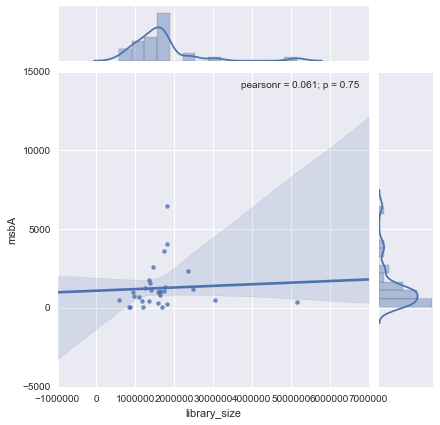

In [48]:
g3 = sns.jointplot("library_size","msbA", kind="reg", data=merged_hmmer)

Here is a plot of the five most abundant gene hits by raw counts. Below we scale the data by total recovered LSU and SSU genes.

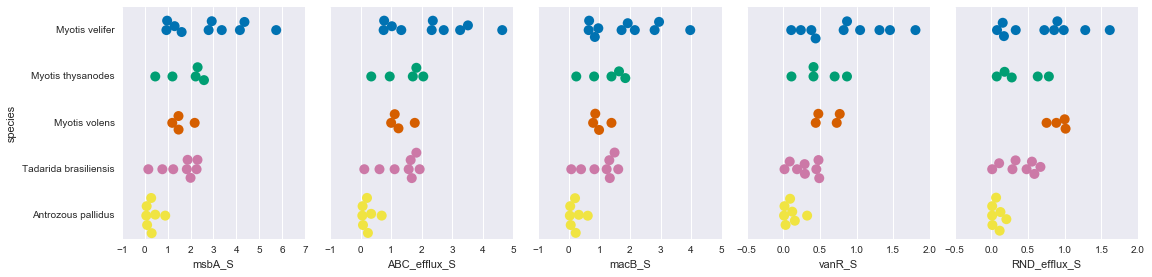

In [49]:
g = sns.PairGrid(merged_hmmer,
                 y_vars=["species"],
                 x_vars=["msbA_S", "ABC_efflux_S","macB_S",
                        "vanR_S","RND_efflux_S"],
                 aspect=.75, size=4)
g.map(sns.swarmplot, palette="colorblind",size=10)

#### 9/29/2016
One thing that strikes me as suspect is the Antrozous pallidus (ANPA) always have the lowest. They are the weird bats in the data set. Big, low aspect ratio wings, plant and ground flight feeding beahvior. 


They have the lowest mean library size 1232007.
And the mean recovered LSU and SSU is 1230, the second highest. That means the gene counts are being scaled hard in the face of smaller library sizes. However the scaling should balance out the gene count???

The Myotis Velifer do not have the greatest number of mean sequences, nor the largest number of recovered LSU and SSU genes. 

I want to see what are the greatest relative resistance genes are across all these bats.

In [55]:
df_counts = pd.DataFrame(hmmer_clean.sum(numeric_only=True).sort_values(ascending=False))

In [56]:
df_rel = pd.DataFrame((df_counts/df_counts.sum()*100))

In [60]:
df_rel.head(11)

,0
gene,
msbA,13.713390
ABC_efflux,11.139557
macB,9.208460
drrA,5.719991
vanR,3.630015
RND_efflux,3.394947
ABC_tran,3.297814
Fluor_Res_DNA_Topo,2.966697
baeR,2.357903


#### 10/4/2016

I am going to use a cutoff of 2% of the total resistome hits to report and compare with other environmental metagenomes. 

#### 9/29/2016
From Nesme
>The macab and bcr efflux pumps accounted for 18.9% and 8.5% of the total ARGD hits in all environments, respectively. Most ARGD-annotated reads detected in metagenomic data sets using our stringent annotation cutoff were related to various types of efflux-pump components: membrane fusion protein from resistance-nodulation cell division efflux pumps (RND) and ATP-binding cassette (ABC) domains related to bacitracin efflux, with 27.9% and 20.8% of the total hits of ARGD annotated sequences in all metagenomes, 

We see a similar pattern macB efflux pump is 9.2%, then ABC_efflux is 11.1%. msbA (ATP-binding cassette) stands out at 13%. 

>etracycline ribosomal protection protein-encoding genes (tet_rpp, 5.7%) and vancomycin resistance-related genes (vanA, 3.6%; vanB, 2.9%; vanC, 3.5%; vanE, 2.3%; vanG, 2.8%; and vanC, 1.8%)

The tet_ribosomoal_protect is 1.6%. Our vanR is 3.63%, vanS 2.3%.

Tentatively our bats resitome looks similar the the 71 environmental metagenomes from Nesme. However I want to see if any gene hits only occur within a given species and not others. So gotta sort out the query for that.

#### 9/30/2016
Not much work on this today. Mostly tracking down references for use in the paper. I need to read up on what other folks have found through metagenomics.

In [21]:
from scipy.spatial.distance import *
import numpy as np
from sklearn import manifold

In [30]:
mds_df = hmmer_clean.drop('id',1)
dist_mat = squareform(pdist(mds_df,'braycurtis'))

In [31]:
pd.DataFrame(dist_mat, columns = merged_hmmer['id'], index=merged_hmmer['id']).head()

id,CC140620_1.antiresfam,CC140620_25.antiresfam,CC140620_33.antiresfam,CC140620_37.antiresfam,CC140620_5.antiresfam,CC150624_21.antiresfam,CC150624_25.antiresfam,CC150624_29.antiresfam,CC150626_1.antiresfam,EST150404_1.antiresfam,...,WCS140623_13.antiresfam,WCS140623_5.antiresfam,WCS140623_9.antiresfam,WCS150622_5.antiresfam,WCS150622_9.antiresfam,WCS150625_13.antiresfam,WCS150625_17.antiresfam,WCS150625_25.antiresfam,WCS150625_33.antiresfam,WCS150625_9.antiresfam
id,,,,,,,,,,,,,,,,,,,,,
CC140620_1.antiresfam,0.000000,0.183236,0.456379,0.637622,0.087144,0.108231,0.141332,0.668325,0.136760,0.622788,...,0.909665,0.266097,0.932605,0.349957,0.707466,0.429603,0.406997,0.493258,0.714499,0.734111
CC140620_25.antiresfam,0.183236,0.000000,0.380812,0.574813,0.148092,0.202183,0.233669,0.585952,0.256428,0.707323,...,0.882870,0.198762,0.912302,0.476067,0.769603,0.381394,0.519847,0.600591,0.780669,0.793370
CC140620_33.antiresfam,0.456379,0.380812,0.000000,0.344240,0.434146,0.469555,0.489449,0.654654,0.504690,0.640540,...,0.903934,0.449275,0.928607,0.644538,0.840312,0.215115,0.415380,0.513493,0.730836,0.748806
CC140620_37.antiresfam,0.637622,0.574813,0.344240,0.000000,0.625923,0.628747,0.609198,0.460088,0.662238,0.791158,...,0.832189,0.569535,0.869193,0.779099,0.913181,0.425969,0.626911,0.707775,0.846142,0.859111
CC140620_5.antiresfam,0.087144,0.148092,0.434146,0.625923,0.000000,0.107739,0.188285,0.653884,0.153159,0.642957,...,0.905040,0.250832,0.929439,0.377785,0.721675,0.415245,0.434533,0.518794,0.729639,0.747459


In [32]:
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=3, n_jobs = 2, 
                   metric=False, max_iter=3000)
results = mds.fit(dist_mat)
coords = results.embedding_

In [33]:
merged_hmmer['X'] = [c[0] for c in coords]
merged_hmmer['Y'] = [c[1] for c in coords]
merged_hmmer.head(3)

gene,id,AAC3,AAC3-I,AAC6-I,AAC6-II,AAC6-Ib,ABC1,ABC2_membrane,ABC_efflux,ABC_tran,...,vanZ,sample,species,location,cave_or_surface,recov_lsu_ssu,library_size,avg_seq_len,X,Y
0,CC140620_1.antiresfam,0.0,1.0,0.0,1.0,0.0,0.0,0.0,940.0,0.0,...,0.0,CC140620_1,Myotis velifer,CAVE,cave,706.0,1413632.0,181.2,0.217848,-0.157751
1,CC140620_25.antiresfam,0.0,0.0,1.0,0.0,0.0,0.0,0.0,645.0,0.0,...,0.0,CC140620_25,Myotis velifer,CAVE,cave,273.0,1629876.0,198.4,0.017682,0.007134
2,CC140620_33.antiresfam,0.0,1.0,0.0,1.0,0.0,18.0,13.0,449.0,275.0,...,0.0,CC140620_33,Myotis velifer,CAVE,cave,193.0,576956.0,193.9,-0.282316,-0.020675


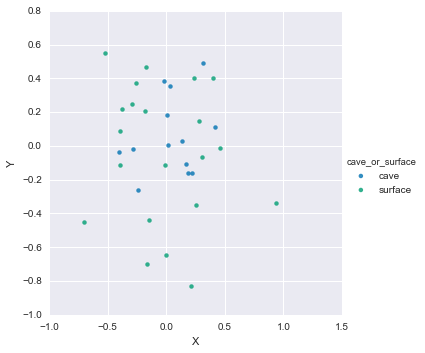

In [34]:
sns.lmplot("X", "Y", data=merged_hmmer, hue='cave_or_surface', fit_reg=False, palette="colorblind")

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from pylab import savefig

In [44]:
mds_df_S = mds_df.div(merged_hmmer['recov_lsu_ssu'],axis=0)
mds_df_S.head(3)

gene,AAC3,AAC3-I,AAC6-I,AAC6-II,AAC6-Ib,ABC1,ABC2_membrane,ABC_efflux,ABC_tran,ACR_tran,...,vanC,vanD,vanH,vanR,vanS,vanT,vanW,vanX,vanY,vanZ
0,0.0,0.001416,0.000000,0.001416,0.0,0.000000,0.000000,1.331445,0.00000,0.000000,...,0.048159,0.050992,0.089235,0.441926,0.283286,0.050992,0.001416,0.016997,0.002833,0.0
1,0.0,0.000000,0.003663,0.000000,0.0,0.000000,0.000000,2.362637,0.00000,0.000000,...,0.058608,0.054945,0.172161,0.824176,0.582418,0.142857,0.003663,0.014652,0.010989,0.0
2,0.0,0.005181,0.000000,0.005181,0.0,0.093264,0.067358,2.326425,1.42487,0.803109,...,0.103627,0.088083,0.108808,0.870466,0.606218,0.113990,0.005181,0.000000,0.010363,0.0


In [45]:
# generate the linkage matrix
Z = linkage(mds_df_S, method='average')

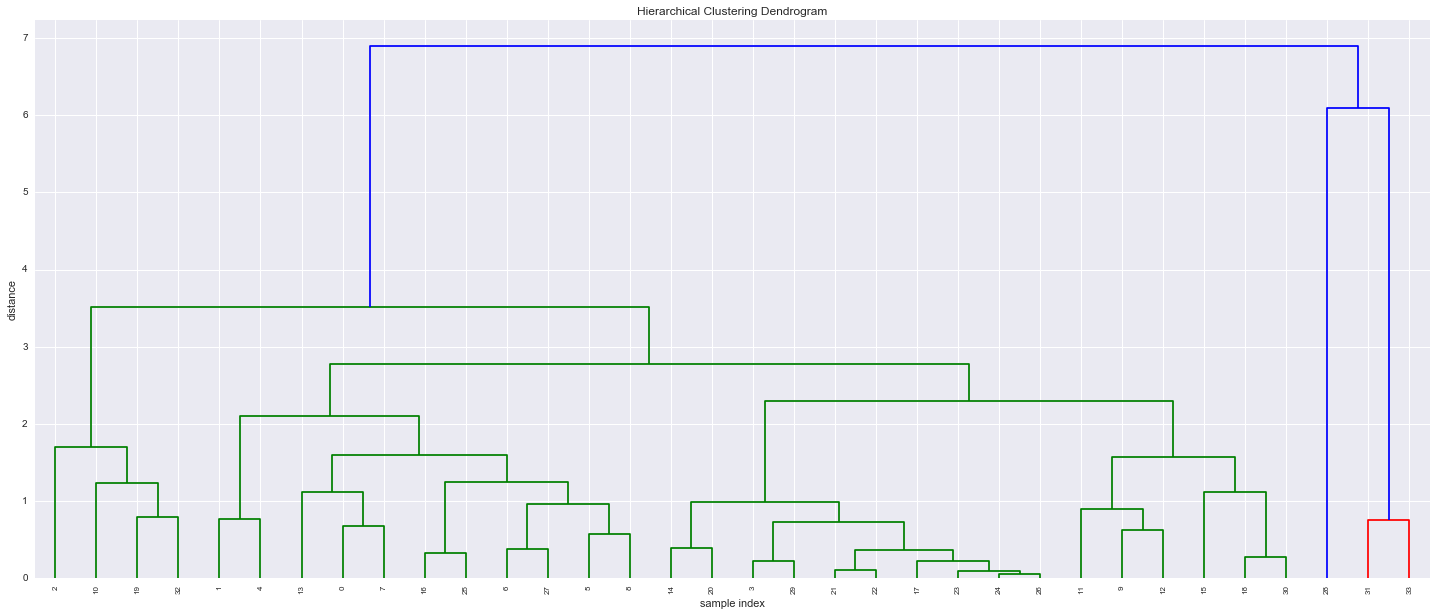

In [46]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
# In matplotlib the show command will reset the figure instance. In other words it goes bye-bye. So you need to save it
# first
plt.savefig('bat_resistome_HCA_average.pdf',bbox_inches='tight')
plt.show()

#### References

Calisher CH, Childs JE, Field HE, Holmes KV, Schountz T. Bats: important reservoir hosts of emerging viruses. Clinical microbiology reviews. 2006 Jul 1;19(3):531-45.

Fitzpatrick D, Walsh F. Antibiotic resistance genes across a wide variety of metagenomes. FEMS microbiology ecology. 2016 Feb 1;92(2):fiv168.

Li B, Yang Y, Ma L, Ju F, Guo F, Tiedje JM, Zhang T. Metagenomic and network analysis reveal wide distribution and co-occurrence of environmental antibiotic resistance genes. The ISME journal. 2015 Nov 1;9(11):2490-502.

Mariita RM, Hossain MJ, Liles MR, Moss AG. Seasonal Variability in the Diversity of Microbial Assemblages and Antibiotic Resistance Determinants of an Estuary System.

Nesme J, Cécillon S, Delmont TO, Monier JM, Vogel TM, Simonet P. Large-scale metagenomic-based study of antibiotic resistance in the environment. Current Biology. 2014 May 19;24(10):1096-100.
